## Linear Regression assumptions:

1. Linear relationship between variables. -1 to 1.
2. Multivariate normality. Normality can be checked with a goodness of fit test, e.g., the Kolmogorov-Smirnov test.  When the data is not normally distributed a non-linear transformation (e.g., log-transformation) might fix this issue.

3. No or little multicollinearity. Multicollinearity occurs when the independent variables are too highly correlated with each other.
Multicollinearity may be tested with three central criteria:

Correlation matrix, Variance Inflation Factor, Tolerance.


4. No auto-correlation. utocorrelation occurs when the residuals are not independent from each other.  For instance, this typically occurs in stock prices, where the price is not independent from the previous price. Regression model for autocorrelation with the Durbin-Watson test. 
5. Homoscedasticity. The data are homoscedastic (meaning the residuals are equal across the regression line).


At least 20 cases for linear regression n > 20.

## Preparing Data For Linear Regression
Linear regression is been studied at great length, and there is a lot of literature on how your data must be structured to make best use of the model.

As such, there is a lot of sophistication when talking about these requirements and expectations which can be intimidating. In practice, you can uses these rules more as rules of thumb when using Ordinary Least Squares Regression, the most common implementation of linear regression.

Try different preparations of your data using these heuristics and see what works best for your problem.

**Linear Assumption**. Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).

**Remove Noise**. Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.

**Remove Collinearity**. Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.

**Gaussian Distributions**. Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.

**Rescale Inputs**: Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization

### Regression evaluation metrics
1. Mean Absolute Error (MAE): Average error.
2. Mean Squared Error (MSE): Punishes larger errors, useful in real world.
3. Root Mean Squared Error (RMSE): The most popular, because is interpretable in the Y units.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [11]:
df_adv = pd.read_csv('advertising.csv')

In [12]:
df_adv.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Exploratory Data Analysis

### Inspection

In [13]:
df_adv.shape

(200, 4)

In [14]:
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [16]:
round(df_adv.describe(),2)

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,15.13
std,85.85,14.85,21.78,5.28
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,11.00
50%,149.75,22.90,25.75,16.00
75%,218.82,36.52,45.10,19.05
max,296.40,49.60,114.00,27.00


### Cleaning

In [18]:
df_adv.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

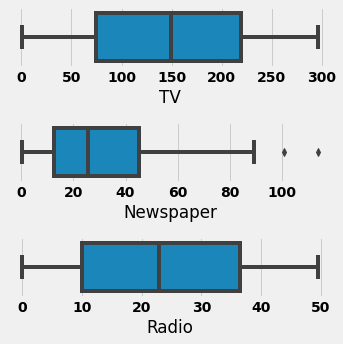

In [21]:
#OUTLIER ANALYSIS
fig, axs = plt.subplots(3, figsize=(5,5))
plt1 = sns.boxplot(df_adv['TV'], ax=axs[0])
plt1 = sns.boxplot(df_adv['Newspaper'], ax=axs[1])
plt1 = sns.boxplot(df_adv['Radio'], ax=axs[2])
plt.tight_layout()
# Not relevant outliers on the boxplots

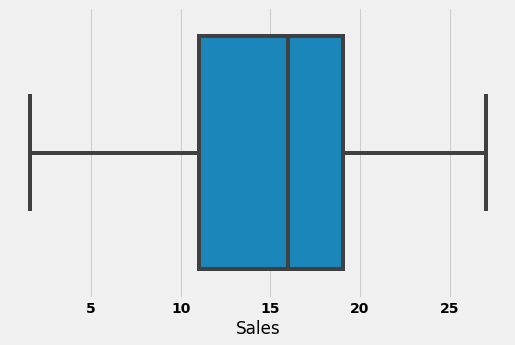

In [22]:
sns.boxplot(df_adv['Sales'])
plt.show()

### Data evaluation for modeling

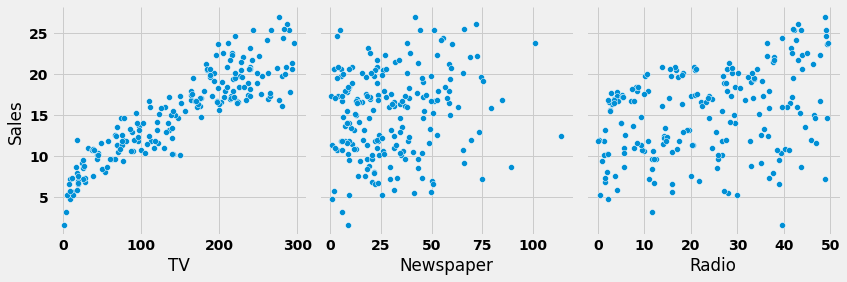

In [23]:
sns.pairplot(df_adv, x_vars=['TV','Newspaper','Radio'], y_vars='Sales',height=4, aspect=1, kind='scatter')

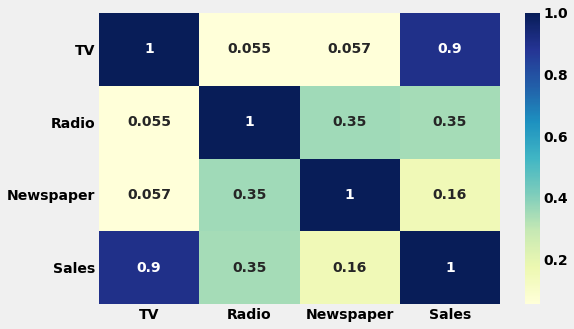

In [24]:
sns.heatmap(df_adv.corr(), cmap='YlGnBu', annot=True)
plt.show()

### Model BUilding

In [28]:
X = df_adv['TV']
y = df_adv['Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [29]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [34]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [35]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [36]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           1.52e-52
Time:                        09:22:32   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

The values we are concerned with are -

The coefficients and significance (p-values)
R-squared
F statistic and its significance
1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.816
Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance

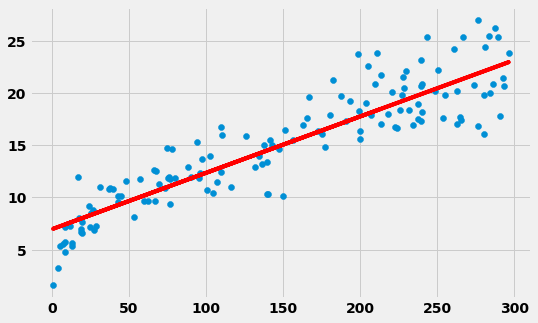

In [37]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r' )
plt.show()

### Model evaluation

Residual analysis
To validate assumptions of the model, and hence the reliability for inference

Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [39]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)


Distribution of the error terms

We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

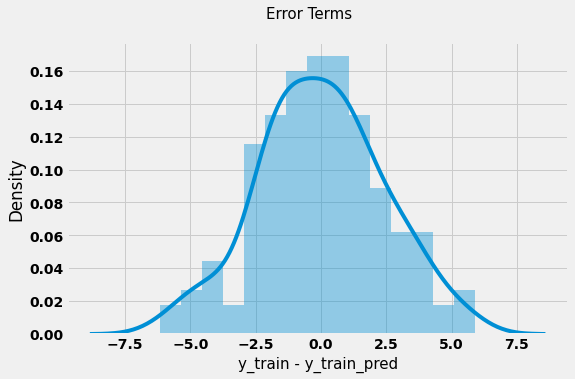

In [40]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

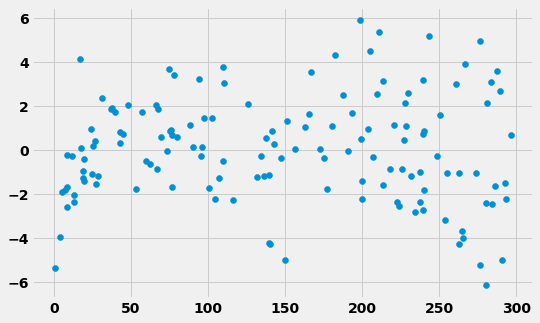

In [41]:
plt.scatter(X_train, res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

### Predictions on the test set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [43]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [44]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [45]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [46]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

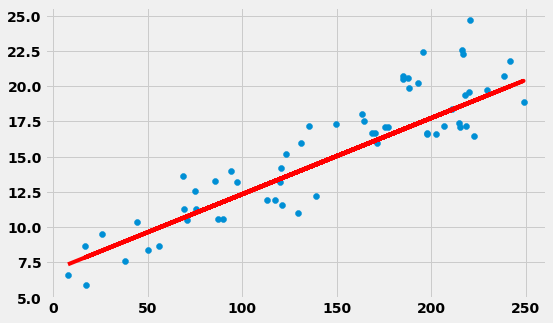

In [47]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()